## Lesson 11: Thompson Sampling

In this lab, we will explore :
- Thompson Sampling.
- mathematical underpinnings of Thompson Sampling, implementation it step by step.
- compare its performance against ε-greedy approach.

**Thompson Sampling**, named after William R. Thompson who introduced the algorithm in 1933, offers an elegant solution to the exploration-exploitation trade-off in the multi-armed bandit problem. It employs a Bayesian approach, combining prior beliefs with observed data to make decisions. The algorithm maintains a probability distribution, or a belief, over the unknown reward probabilities associated with each arm. It samples from these distributions and chooses the arm with the highest sample, effectively balancing exploration and exploitation.

Thomson Sampling employs a sampling decision rule, which involves drawing samples from the posterior distributions of each arm’s reward probability. These samples reflect the agent’s uncertainty about the true reward probabilities. The arm with the highest sampled reward is chosen for the current round. By sampling from the posterior distributions, Thomson Sampling inherently explores arms with higher uncertainty and exploits arms with higher expected rewards, striking a balance between exploration and exploitation.


**Steps for Thomson Sampling:**


1.   Initialize the prior distributions: Start by assigning appropriate prior distributions to the unknown reward probabilities associated with each arm. The choice of priors depends on the problem domain and available prior knowledge. Common choices include the Beta distribution, which is conjugate to the Bernoulli distribution, or non-informative priors such as the uniform distribution.
2.   Sample from the posterior distributions: For each round of the bandit problem, sample a reward probability value for each arm from its respective posterior distribution. To do this, draw samples from the prior distributions and update them using Bayes’ rule based on the observed rewards.
3.   Select the arm to play: Compare the sampled reward probabilities for each arm and select the arm with the highest sampled reward probability. This arm will be played in the current round.
4.   Observe the reward: Pull the selected arm and observe the resulting reward. Update the posterior distribution for the chosen arm based on the observed reward. This can be done by applying Bayes’ rule to obtain the posterior distribution for the reward probability of the arm.
5.   Repeat steps 2-4: Repeat the sampling, arm selection, and reward observation steps for a predetermined number of rounds or until a stopping criterion is met. The posterior distributions are updated iteratively as more data is observed, allowing the algorithm to adapt and refine its knowledge.
6.   Balance exploration and exploitation: The key advantage of Thomson Sampling is the inherent balance between exploration and exploitation. By sampling from the posterior distributions, arms with higher uncertainty are more likely to be explored, while arms with higher expected rewards are more likely to be exploited. This balance ensures efficient learning and optimal decision-making over time.
7.   Update the prior distributions: If new prior knowledge becomes available during the bandit problem, the prior distributions can be updated accordingly. This is especially useful in scenarios where the problem dynamics change or new information is acquired.
8.   Evaluate performance: Assess the performance of Thomson Sampling by measuring the cumulative reward obtained over the rounds. Compare it with other algorithms or heuristics to gauge its effectiveness in maximizing rewards.

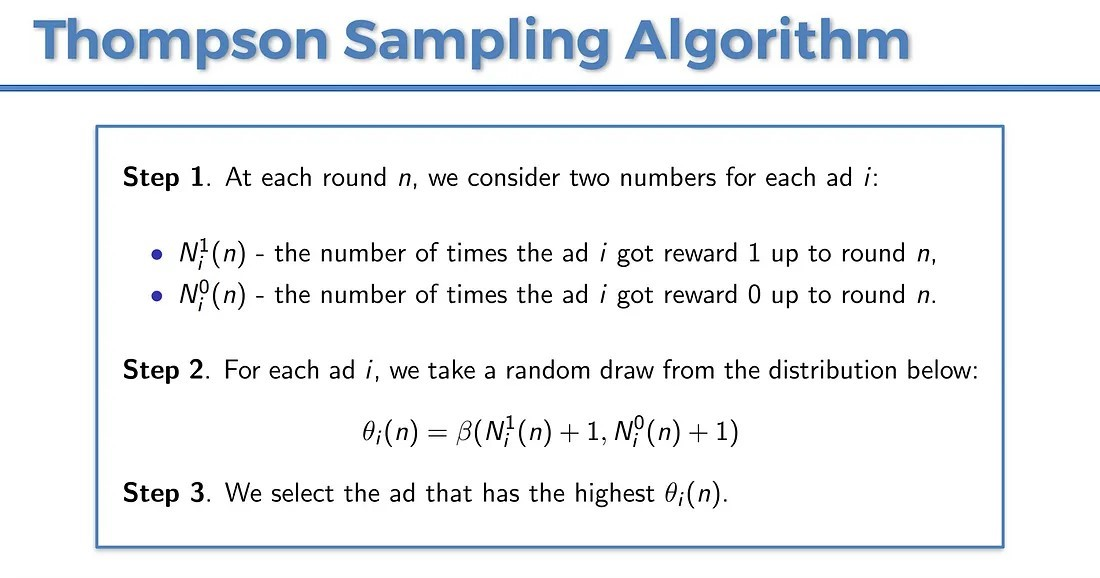


**Applications of Thompson Sampling:**

Thompson Sampling has been successfully applied in various domains, including:

*   *Online Advertising:* To select which ads to display to users to maximize click-through rates.
*   *Recommendation Systems:* To choose which content to recommend to users while continuously learning about their preferences.
*   *Clinical Trials:* To determine the most effective treatment options while minimizing patient risk.
*   *Dynamic Pricing:* To adjust prices in response to consumer behavior and maximize revenue.


##Implementation of Thompson Sampling:

Let's assume we've 3 arms in a slot machine (instead or arms you can think of any 3 variants, say, variants of ads you want to test). Each arm has its own payout (reward) percentage which is unknown. Objective is to win maximum payout. To achieve maximum wins, we (agent) need to play with each arm (exploration) to estimate arm with high payouts, while simultaneously repeat with arm which we think is best so far (exploitation).

We assume that each arm's payout has a probability distribution (rather than a point estimate of percentage). Initially the distribution can be uniform (prior distribution) because we've not played anything yet. As we play, we measure the success and failures of each arm, think of each arm as Bernoulli variable. After each observation is made we need to update the distribution (posterior distribution).

Which probability distribution to use to model arm's payouts? Beta distribution. This distribution is defined on the interval $[0, 1]$, which makes it suitable for modeling probabilities or proportions. It can represent uncertainty about the success/failure rates or proportions of categorical outcomes.

1. Imports the necessary libraries :

In [ ]:
import numpy as np
import io
import cv2
from scipy.stats import beta
import matplotlib.pyplot as plt
import random
import copy
import itertools






2. Helper Function (get_img_from_fig): This function converts a Matplotlib figure into a NumPy array representing an image:

- Saves the figure to a bytes buffer.

- Reads the buffer into a NumPy array.

- Decodes the image using OpenCV and converts it to RGB format.

- Returns the resulting image.



In [ ]:
# define a function which returns an image as numpy array from figure
def get_img_from_fig(fig, dpi = 120):
    buf = io.BytesIO()
    fig.savefig(buf, format = "png", dpi = dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype = np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img




3. Initial Setup:
- **actual_prob:** The actual probabilities of winning for each arm (0.1, 0.7, 0.5).

- **succ_fail:** A list to track the number of successes and failures for each arm, initialized to zero.

- **gif_ims:** A list to store images for creating a GIF of the process.

In [ ]:
actual_prob = [0.1, 0.7, 0.5]

succ_fail = [[0,0], [0,0], [0,0]]

gif_ims = []



4. Main Loop: Thompson Sampling

In [ ]:
for trials in range(200):

    # plot
    x = np.linspace(0, 1.0, 100)
    y = [beta.pdf(x, s+1, f+1) for s, f in succ_fail]
    fig, ax = plt.subplots(figsize = (7,5))
    ax.plot(x, y[0], "b-", x, y[1], "r-", x, y[2], "g-")
    ax.set(xlabel = 'payout probabilities', ylabel = 'PDF', title = 'Thompson Sampling')
    gif_ims.append(get_img_from_fig(fig))
    plt.close()


    # Sample a data point (thompson sampling) from all arms' Beta distribution
    samples = [np.random.beta(s+1, f+1) for s, f in succ_fail]

    # Pick the arm with highest sampled estimate
    best_arm = np.argmax(samples)

    # Play with best arm
    # since each arm is modelled as bernoulli variable, to sample from bernoulli distribution is same as
    # sampling a uniform distrib variable & comparing with p (payout), if its less than p, then Success else Failure
    if np.random.uniform() < actual_prob[best_arm]:
        # if we win with this arm
        succ_fail[best_arm][0] += 1
    else:
        # if we lose with this arm
        succ_fail[best_arm][1] += 1

5. GIF Creation Code:



*   Importing imageio
*   Saving the GIF



In [ ]:
try:
    import imageio
except:
    !pip install imageio
    import imageio
kwargs_write = {'duration':0.001, 'quantizer':'nq'}
imageio.mimsave('./final.gif', gif_ims) #, kwargs=kwargs_write)

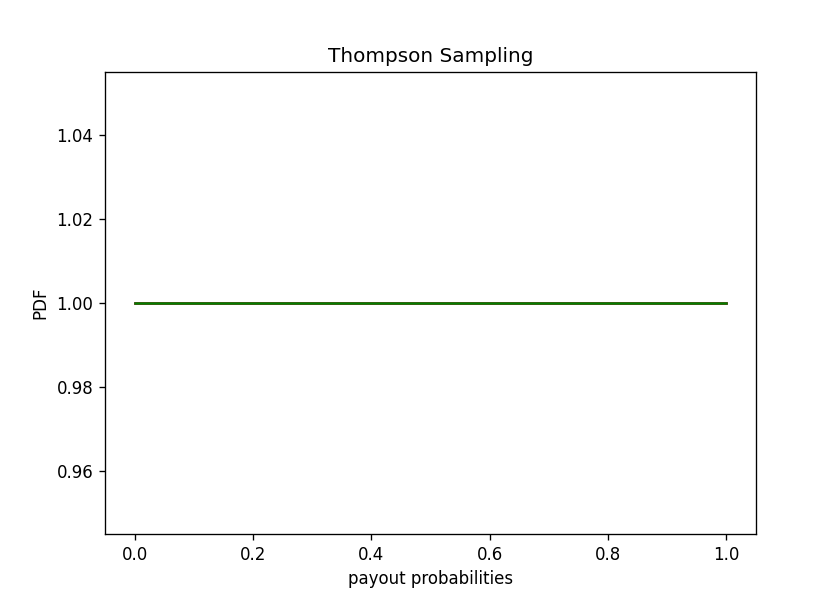


## Comparing Thompson sampling against $\varepsilon$-greedy

This example implements a comparison between the Epsilon-Greedy strategy and the Thompson Sampling strategy for solving the Multi-Armed Bandit problem. The goal is to determine which strategy performs better in terms of maximizing the total reward obtained over a number of trials.

1.  Multiarmed Bandit Class Definition:

In [ ]:
class MultiarmedBandit():
  def __init__(self, probabilities):
    self.N = len(probabilities)
    assert self.N > 0, 'There must be at least one bandit'
    assert not any([(p < 0 or p > 1) for p in probabilities]), 'Invalid winning rates.'
    self.probabilities = copy.deepcopy(probabilities)

  def play(self, bandit):
    assert (bandit >=0 and bandit < self.N), 'Invalid bandit selected'
    return 1 if random.uniform(0, 1) < self.probabilities[bandit] else 0

2. Base Sampler Class Definition:

In [ ]:
class Sampler():
  def __init__(self, n_arms):
    self.counts = [0 for col in range(n_arms)]
    self.values = [0.0 for col in range(n_arms)]

  def select_arm(self):
    raise NotImplementedError('Arm selection is nod defined')

  def update(self, chosen_arm, reward):
    self.counts[chosen_arm] = self.counts[chosen_arm] + 1
    n = self.counts[chosen_arm]

    value = self.values[chosen_arm]
    new_value = ((n - 1) / float(n)) * value + (1 / float(n)) * reward
    self.values[chosen_arm] = new_value

3. Epsilon-Greedy Strategy Class Definition:

In [ ]:
class EpsilonGreedy(Sampler):
  def __init__(self, n_arms, epsilon):
    super().__init__(n_arms)
    self.epsilon = epsilon

  def select_arm(self):
    if random.random() > self.epsilon:
      return np.argmax(self.values)
    else:
      return random.randrange(len(self.values))

4. Thompson Sampling Strategy Class Definition:

In [ ]:
class Thompson(Sampler):
  def __init__(self, n_arms):
    super().__init__(n_arms)

  def select_arm(self):
    alphas = [1 + v * n for v, n in zip(self.values, self.counts)]
    betas = [1 + (1 - v) * n for v, n in zip(self.values, self.counts)]
    ps = [beta.rvs(a, b) for a, b in zip(alphas, betas)]
    return np.argmax(ps)

5. Simulation Setup:

In [ ]:
probabilities = [0.314, 0.42, 0.141, 0.6371]
casino = MultiarmedBandit(probabilities)
N_trials = 100

6. Epsilon-Greedy Strategy Execution:

In [ ]:
epsilon_greedy = EpsilonGreedy(len(probabilities), 0.05)
eg_rewards = [0]

for _ in range(N_trials):
  arm = epsilon_greedy.select_arm()
  reward = casino.play(arm)
  epsilon_greedy.update(arm, reward)
  eg_rewards.append(eg_rewards[-1] + reward)

7. Thompson Sampling Strategy Execution:

In [ ]:
thompson = Thompson(len(probabilities))
th_rewards = [0]

for _ in range(N_trials):
  arm = thompson.select_arm()
  reward = casino.play(arm)
  thompson.update(arm, reward)
  th_rewards.append(th_rewards[-1] + reward)

8. Results Visualization:

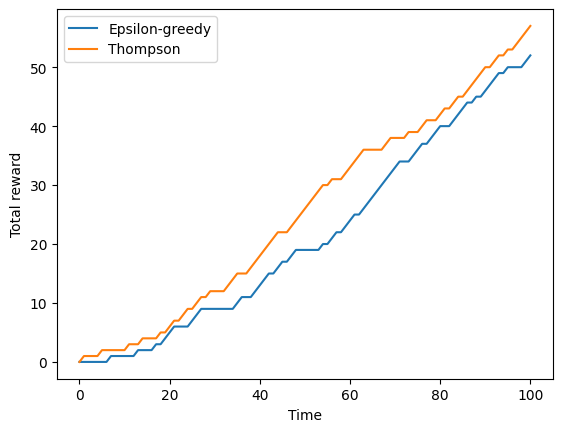

In [ ]:
plt.plot(eg_rewards, label='Epsilon-greedy')
plt.plot(th_rewards, label='Thompson')
plt.ylabel('Total reward')
plt.xlabel('Time')
plt.legend()

As you could see, Thompson sampling performs the way better than Epsilon-greedy approach. Furter, Thompson sampling works well with a non-stationary distribution:

8. UnfairMultiarmedBandit Class Definition:
This class extends the MultiarmedBandit class to simulate an unfair scenario where the payout probabilities of the bandits change over time, modeling a non-stationary environment.

In [ ]:
class UnfairMultiarmedBandit(MultiarmedBandit):
  def __init__(self, probabilities):
    super().__init__(probabilities)

  def play(self, bandit):
    r = super().play(bandit)
    # Suppose that greedy company arbitrary increases or decreases your winning chance
    if random.uniform(0, 1) < 0.5:
      self.probabilities[bandit] *= 0.99
    else:
      self.probabilities[bandit] *= 1.01
    return r

9. Simulation Setup with UnfairMultiarmedBandit:

In [ ]:
probabilities = [0.314, 0.42, 0.141, 0.6371]
casino = UnfairMultiarmedBandit(probabilities)
N_trials = 100

10. Epsilon-Greedy Strategy Execution with UnfairMultiarmedBandit:

In [ ]:
epsilon_greedy = EpsilonGreedy(len(probabilities), 0.05)
eg_rewards = [0]

for _ in range(N_trials):
  arm = epsilon_greedy.select_arm()
  reward = casino.play(arm)
  epsilon_greedy.update(arm, reward)
  eg_rewards.append(eg_rewards[-1] + reward)

11. Thompson Sampling Strategy Execution with UnfairMultiarmedBandit:

In [ ]:
thompson = Thompson(len(probabilities))
th_rewards = [0]

for _ in range(N_trials):
  arm = thompson.select_arm()
  reward = casino.play(arm)
  thompson.update(arm, reward)
  th_rewards.append(th_rewards[-1] + reward)

12. Results Visualization:

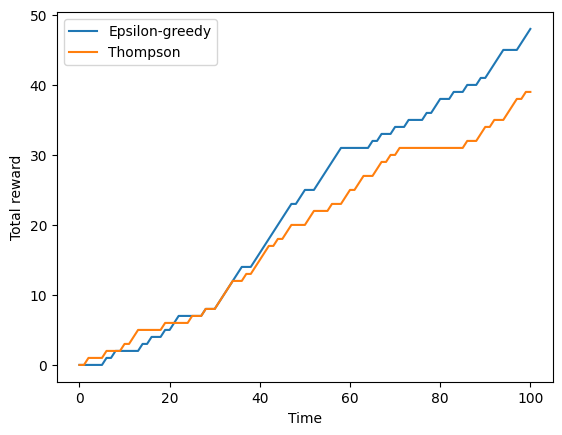

In [ ]:
plt.plot(eg_rewards, label='Epsilon-greedy')
plt.plot(th_rewards, label='Thompson')
plt.ylabel('Total reward')
plt.xlabel('Time')
plt.legend()

If you repeat the experiment multiple times you will see that most of the times Thompson sampling gets higher total reward than Epsilon-greedy.

## Product assortment
 Imagine that you are produce $n$ product types. Every week you can choose which products will be offered (indicated by $x_i$ variable). For each product there is an associated profit per unit $p_i$. Further, every week there is a certain demand for the product $d_i$ coming from log-Gaussian distribution:

$$
\log d_i | \theta, x \sim N((\theta x)_i, \sigma^2)
$$

Some of your products might complement each other (and thus their sales positively correlate with each other) or be substitutes (and thus their sales negatively correlate with each other). For examply, most likely bread and milk are bought together while Paracetamol and alcohol are less likely to be bought together ~~(unless someone wants to die)~~.


Refer to [Section 7.2 of the tutorial](https://web.stanford.edu/~bvr/pubs/TS_Tutorial.pdf) to complete exercises.

### Exercise 1:
Complete the following code to do sample demand and compute reward.

In [ ]:
class RewardProductAssortment:
    def __init__(self, theta, var):
        self.n = theta.shape[0] # number of products
        self.profit = 1 / self.n # profit assosiated to each product
        self.var = var
        self.theta = copy.deepcopy(theta).reshape(-1)

    def get(self, x):
        demands, rewards = [], []
        for i in range(self.n):
            if x[i] != 0:

                # Begin
                 .............. # your code is here.............
                # End
                demands.append(d_i)
                rewards.append(reward)
        return demands, rewards

### Exercise 2:
Complete the following code to compute expected profit.

In [ ]:
class TSProductAssortment:
    def __init__(self, n, var):
        self.n = n # number of products
        self.var = var

        # parameters of prior distribution. We try to represent a matrix of size n by n
        self.mu_0 = np.zeros(n*n)
        self.cov_0 = np.eye(n*n) + np.sqrt(var) * (np.ones((n*n,n*n)) - np.eye(n*n))

        self.profit = 1 / n # equal profit for each product

    def select_assortment(self):
        expected_profits = []
        x_value = [0, 1]
        x_vectors = list(itertools.product(x_value, repeat=self.n))
        theta = np.random.multivariate_normal(self.mu_0, self.cov_0)


        # Begin
             .............. # your code is here.............
        # End

        return x_vectors[np.argmax(expected_profits)] # select products based on the highest expected profit

    def update(self, selected_products, demand, reward):
        selected_products = list(selected_products)
        selected_ids = [i for i, s in enumerate(selected_products) if s == 1]

        # create a selection matrix
        S = np.zeros((len(demand), self.n))
        for j in range(len(demand)):
            i = selected_ids[j]
            S[j,i] = 1 if selected_products[i] == 1 else 0

        # create a matrix W by taking the Kronecker product of selected_products and S
        W = np.kron(selected_products, S)

        # create a vector z taking the natural log of demands
        z = np.log(demand)

        # update the mean and covariance of the prior distribution
        cov_n_inv = np.linalg.inv(self.cov_0) + (1 / self.var) * W.T @ W
        cov_n = np.linalg.inv(cov_n_inv)
        mu_n = cov_n @ (np.linalg.inv(self.cov_0) @ self.mu_0 + (1 / self.var) * W.T @ z)

        self.mu_0 = mu_n
        self.cov_0 = cov_n

In [ ]:
# define the parameters
n = 6
var = 0.04
num_iterations = 500

theta = np.array(
[[1.23207994,-0.06103542,0.60034175,0.26453487,0.12652134,
0.05237662],
[-0.06103542,3.71989617,-0.11812647,-2.04080272,2.85785816,
-0.58437546],
[0.60034175,-0.11812647,1.89051133,-0.7754829,0.36348837,
-0.39664255],
[0.26453487,-2.04080272,-0.7754829,4.806801,-2.4103273,
0.63538556],
[0.12652134,2.85785816,0.36348837,-2.4103273,3.92416858,
0.18912621],
[0.05237662,-0.58437546,-0.39664255,0.63538556,0.18912621,
1.50256759]]
)

rewards_for_pa = RewardProductAssortment(theta, var)

ts = TSProductAssortment(n, var)
rewards = []

for t in range(num_iterations):
    # select product assortment
    reward_total = 0
    chosen_products = ts.select_assortment()
    # get demand and reward values for chosen products
    demand, reward = rewards_for_pa.get(chosen_products)

    # get the total reward
    for i in range(len(reward)):
        reward_total += reward[i]
    rewards.append(reward_total)

    # update algorithm
    ts.update(chosen_products, demand, reward)

cumulative_rewards = np.cumsum(rewards)
average_rewards = cumulative_rewards / (np.arange(num_iterations) + 1)


In [ ]:
assert len(chosen_products) == n, "Selected products array length should match number of products"
assert len(demand) == len(reward), "Demand and reward lists should be of the same length"
assert rewards[-1] >= 0, "Reward should be non-negative"

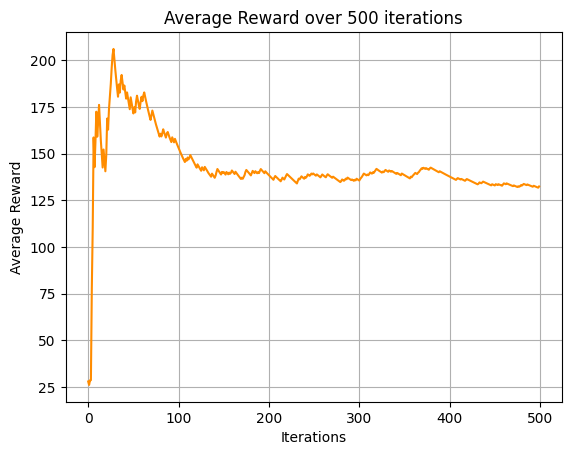

In [ ]:
# plot the average rewards obtained per iteration
plt.plot(average_rewards, color='darkorange')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Average Reward')
plt.title(f'Average Reward over {num_iterations} iterations')
plt.show()

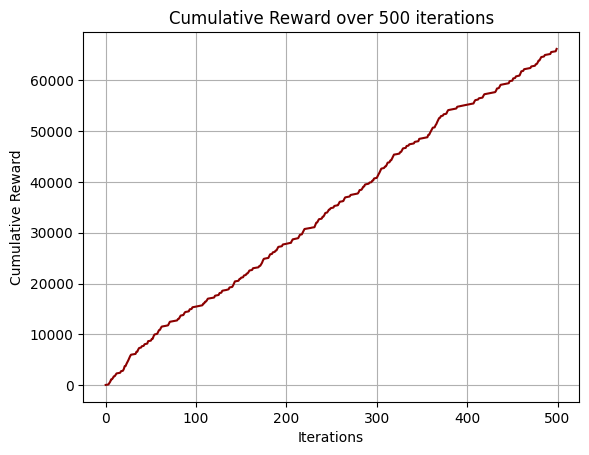

In [ ]:
# plot the cumulative rewards obtained per iteration
plt.plot(cumulative_rewards, color='darkred')
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Cumulative Reward')
plt.title(f'Cumulative Reward over {num_iterations} iterations')
plt.show()

In [ ]:
assert len(average_rewards) == num_iterations, "Average rewards array length should match number of iterations"
assert len(cumulative_rewards) == num_iterations, "Cumulative rewards array length should match number of iterations"
assert cumulative_rewards[-1] >= 0, "Final cumulative reward should be non-negative"

##Conclusion:


In this lab, we implemented and analyzed Thomson sampling, and compared it to the ε-greedy algorithm.
By the end of this lab, you should have a good understanding of Thompson sampling and its implementation and how it compares to the ε-greedy algorithm in balancing exploration and exploitation in the multi-armed bandit problem.